**АБ тесты**


**Импорт необходимых модулей**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random as rnd
from scipy import stats
from tqdm import tqdm

**Моделирование данных**

Средний чек обычного расположения пицц Н0: 98.24890598504463
Средний чек, предпологаемо увеличится H1: 104.14384034414732
Разница 6%


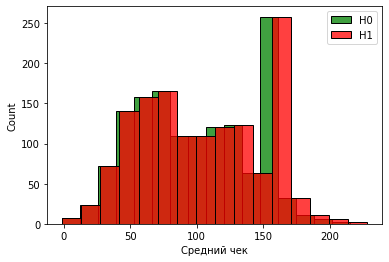

In [3]:
rnd.seed(0) # строчка нужна чтобы случайные числа были одинаковыми от запуска к запуску
np.random.seed(0) # вторая строка нужная чтобы случайные числа были одинаковыми от запуска к запуску

true_effect = 0.06 # настоящий эффект увеличения среднего чека, который приносит перестановка пицц. Относительный. Альтерантивная гипотеза mean1 = mean0*(1 + MDE)
# для однохвостового эксперимента на увечичение true_effect >= 0

# средние чеки клиентов на исторических данных компании
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

# моделируем, что средний чек увеличится на true_effect %. Сможем ли мы обнаружить это увеличение а АБ тесте?
L1 = L0 * (1 + true_effect)

print('Средний чек обычного расположения пицц Н0:', np.mean(L0))
print('Средний чек, предпологаемо увеличится H1:', np.mean(L1))
print(f'Разница {int((np.mean(L1)/np.mean(L0) - 1)*100)}%')

plt.xlabel('Средний чек')
sns.histplot(L0, color='green', label='H0')
sns.histplot(L1, color='red', label='H1')
plt.legend();

**Сейчас стадия планирования эксперимента. Мы не знаем, какой эффект будет, лишь предполагаем значение true_effect. Это значение всегда можно поменять в симуляции**

**Объявление функции симуляции одного АБ-теста**

In [4]:
def one_ab_test(na, nb, La, Lb):
  sub_a = [rnd.choice(La) for _ in range(na)] # из генеральной совокупности La выборка случайных na элементов
  sub_b = [rnd.choice(Lb) for _ in range(nb)] # из генеральной совокупности Lb выборка случайных na элементов
  return stats.ttest_ind(sub_a, sub_b).pvalue # проведение Т-теста, расчет p_value

# **Задание №0**

**Найдите любое na, чтобы при true_effect = 0.06 различия получились бы статистически значимыми**

In [6]:
rnd.seed(0)
np.random.seed(seed=0)

na = 8932

nb = 100
pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)
alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Из совокупности L0 нужно выбрать {na} элемента, чтобы получить статистически значимые различия')

В результате получили pvalue 0.04774367029659804
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Из совокупности L0 нужно выбрать 8932 элемента, чтобы получить статистически значимые различия


#**Задание №1**
**Для true_effect = 0.01, найдите любые такие na и nb, чтобы результат эксперимента был значим. Но при (na - 40) и (nb - 40) результат эксперимента уже не значим**


In [7]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.01
L1 = L0 * (1 + true_effect)

na = 19810
nb = 19810

pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Значение na={na}, значение nb={nb}')

В результате получили pvalue 0.0476934171078091
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Значение na=19810, значение nb=19810


#**Задание №2**
**Для true_effect = 0.10, найдите любые такие na и nb, чтобы результат эксперимента был значим. Но при (na - 40) и (nb - 40) результат эксперимента уже не значим. Используйте rnd.seed(0)**

In [8]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.1
L1 = L0 * (1 + true_effect)

na = 168
nb = 168

pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Значение na={na}, значение nb={nb}')

В результате получили pvalue 0.04720043138011488
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Значение na=168, значение nb=168


#**Задание №3**
**Для true_effect = 0.30, найдите любые такие na и nb, чтобы результат эксперимента был значим. Но при (na - 40) и (nb - 40) результат эксперимента уже не значим. Используйте rnd.seed(0)**

In [9]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.3
L1 = L0 * (1 + true_effect)

na = 59
nb = 59

pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Значение na={na}, значение nb={nb}')

В результате получили pvalue 0.035253624105105824
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Значение na=59, значение nb=59


#**Задание №4**
**Для na = 100, nb = 100 подберите минимальный true_effect, чтобы результат эксперимента был значим, но (true_effect - 0.02) результат не значим (придётся перезапускать ячейку с true_effect). Используйте rnd.seed(0)**

In [ ]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.0948

L1 = L0 * (1 + true_effect)
na = 100
nb = 100
one_ab_test(na, nb, L0, L1)
pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Значение true_effect={true_effect}')

В результате получили pvalue 0.04983933882642012
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Значение true_effect=0.0948


#**Задание №5**
**Для na = 1000, nb = 1000 подберите минимальный true_effect, чтобы результат эксперимента был значим, но (true_effect - 0.02) результат не значим. Используйте rnd.seed(0)**

In [ ]:
rnd.seed(0)
np.random.seed(seed=0)

true_effect = 0.0659

L1 = L0 * (1 + true_effect)
na = 1000
nb = 1000
one_ab_test(na, nb, L0, L1)
pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

alpha = 0.05
if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')
print(f'Значение true_effect={true_effect}')

В результате получили pvalue 0.04986746982127612
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен
Значение true_effect=0.0659


*Минимально обнаружимый эффект: **MDE**. При данных alpha, beta, na, nb.* MDE = min(true_effect)
<br>MDE больше - меньше время проведения - меньше затрат - меньше точность
<br>МDE меньше - больше время проведения - больше затрат - больше точность 
<br>Нужно искать золотую середину

#**Задание №6**
**Установите стандартные значения alpha и beta. Менеджер выделил на ваш эксперимент 30 дней. Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б). Рассчитайте минимальный true_effect для такой продолжительности эксперимента. Минимальный, значит, что при true_effect можем засечь, а true_effect - 0.01 уже не сможем. Используйте rnd.seed(0)**


In [ ]:
rnd.seed(0)
np.random.seed(0)

true_effect = 0.1051

alpha = 0.05
beta = 0.20 
N = 300 #Всего поток 30*20 = 600, делим пополам для А и Б, получится 300

# здесь всё ещё случайное распределение симулирующее средний чек. На практике L0 - ваши исторические данные по этой метрике
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 
L1 = L0 * (1 + true_effect)
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 

error2 = [pv for pv in p_values if pv > alpha]
print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect);
print(f'Значение true_effect={true_effect}')

100%|██████████| 1000/1000 [00:00<00:00, 1199.97it/s]


Ошибку 2 рода мы совершили в 0.197 доле случаев
Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать


#**Задание №7**
**Установите стандартное значения alpha. Менеджер попросил построить такой эксперимент, чтобы точно обнаружить разницу в среднем чеке 1%. Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б). Если менеджеру принципиально обнаружить эффект, вы не хотите совершить ошибку II рода. Выберите любой beta лучше того, который принят в индустрии. Расчитайте продолжительность эксперимента для таких параметров. Используйте rnd.seed(0)**


In [ ]:
rnd.seed(0)
np.random.seed(0)

true_effect = 0.01
alpha = 0.05

beta = 0.15 

N = 32900

# здесь всё ещё случайное распределение симулирующее средний чек. На практике L0 - ваши исторические данные по этой метрике
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

L1 = L0 * (1 + true_effect)
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 

error2 = [pv for pv in p_values if pv > alpha]

print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect);
print(f'Продолжительность эксперимента составит {N/20} дней')

100%|██████████| 1000/1000 [00:56<00:00, 17.69it/s]


Ошибку 2 рода мы совершили в 0.142 доле случаев
Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать
Продолжительность эксперимента составит 1645.0 дней


#**Задание №8**
**Появилась мысль, что работающая сейчас система скидок занижает нам средний чек. Хотим отключить половину потока клиентов от системы скидок. Ожидаем увеличение среднего чека на 12%. Если эффект меньше, согласны это не увидеть. Не хотим допустить ошибку I рода. Установите значения alpha, чтобы эксперимент был точнее, чем стандартное значние alpha. Поток клиентов 20 человек в день (часть в группу А, другая часть в группу Б). Рассчитайте продолжительность эксперимента для таких параметров. Используйте rnd.seed(0)**


In [ ]:
rnd.seed(0)
np.random.seed(0)

true_effect = 0.12
alpha = 0.01
beta = 0.12 
N = 400   

pvalue = one_ab_test(na, nb, L0, L1)
print('В результате получили pvalue', pvalue)

if pvalue < alpha:
  print('В эксперименте мы обнаружили значимое различие. Объём выборки достаточен')
else:
  print('В эксперименте мы не обнаружили значимых различий. Объём выборки маловат')

# здесь всё ещё случайное распределение симулирующее средний чек. На практике L0 - ваши исторические данные по этой метрике
L0 = np.array(list(stats.norm(60, 20).rvs(size=600)) + [150]*200 + list(stats.norm(120, 30).rvs(size=600))) 

L1 = L0 * (1 + true_effect)
p_values = [one_ab_test(N, N, L0, L1) for _ in tqdm(range(1000)) ] 

error2 = [pv for pv in p_values if pv > alpha]

print('\nОшибку 2 рода мы совершили в', len(error2)/len(p_values), 'доле случаев')

if len(error2)/len(p_values) < beta:
  print('Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать')
else:
  print('Вероятность ошибки II рода cлишком большая. Объём выборок чересчур маленький. Эксперимент не сможет засечь различие межу А и Б величиной', true_effect);
print(f'Продолжительность эксперимента составит {N/20} дней')

В результате получили pvalue 0.0008666253120373769
В эксперименте мы обнаружили значимое различие. Объём выборки достаточен


100%|██████████| 1000/1000 [00:01<00:00, 982.16it/s]


Ошибку 2 рода мы совершили в 0.11 доле случаев
Вероятность ошибки II рода удовлетворительная. Объём выборок подходящий. Эксперимент можно запускать
Продолжительность эксперимента составит 20.0 дней
